# Time Series Visualization

### Group Members and Roles

- Group Member 1 (Role)
- Group Member 2 (Role)
- Group Member 3 (Role)


In this Discussion, we'll practice our skills with `numpy` indexing and `matplotlib` plotting. Our ultimate goal is to plot time series of several US financial equities, also known as ***stonks***. However, our data has been scrambled by our clumsy research assistant, and we need to unscramble it prior to plotting. 

## §0. Intro to pyplot

In this Discussion, we'll introduce the `matplotlib` package for data visualization. The standard way to import the `pyplot` module from the matplotlib package is:  



In [1]:
import numpy as np
from matplotlib import pyplot as plt

We've seen a few examples of using `matplotlib` functions before, e.g. when visualizing random walks. In these cases, we called `plt.plot()` and it "just worked." In order to obtain finer-grained control over our visualizations, we are going to start with the "object-oriented interface" to `matplotlib`. Here are the main ingredients: 

1. A *figure* is the overall space in which visualizations may be created. 
2. An *axis* is a single visualization (i.e. "a plot"). Figures can contain one or more axes. 

<figure class="image" style="width:80%">
  <img src="https://2.bp.blogspot.com/-F__I5bCe3uI/XRS1Y3gdP9I/AAAAAAAAHxk/plElt8VRYRMp42BuHTe9wkD29hZaPvo-ACLcBGAs/s1600/figure_axes.PNG" alt="Four blank axes (plots) with gridlines, arranged in a 2x2 grid. The four axes form a single figure">
  <figcaption><i>Image from the <a href = "https://www.listendata.com/2019/06/matplotlib-tutorial-learn-plot-python.html"> ListenData</a> matplotlib tutorial.  </i></figcaption>
</figure>

The basic workflow for `matplotlib` figures is:

1. Create a figure. 
2. Add one or more axes. 
3. Add data markers (i.e. "the plot") to the axes. 
4. Add annotation (axis labels, titles, ticks, legends)
5. Save the figure. 

Let's work through these stages. 

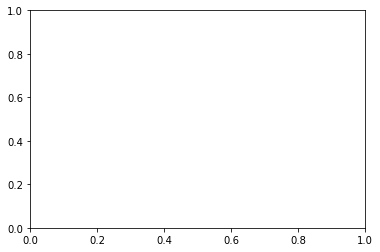

In [2]:
# create a single figure with a single axis (1 row x 1 column)
fig, ax = plt.subplots(1, 1)

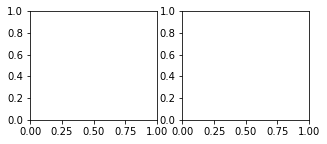

In [3]:
# two plots side by side, using figsize to stretch 
# them out to a better aspect ratio
fig, ax = plt.subplots(1, 2, figsize = (5, 2))

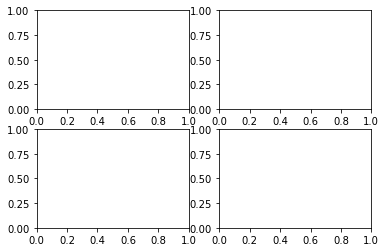

In [4]:
# 2x2 grid
fig, ax = plt.subplots(2, 2)

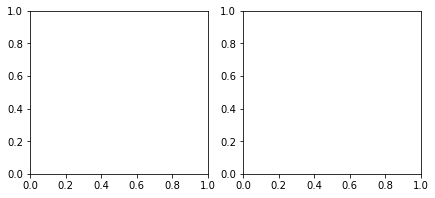

In [5]:
#vary the sizes of individual plots
fig, ax = plt.subplots(1, 2, figsize = (7, 3))

In [6]:
# something to plot

x = np.linspace(0, 2*np.pi, 21)
y = np.sin(x)
z = np.log(x)

/var/folders/80/t18w__tj31q3bcdd81x3kgjh0000gn/T/ipykernel_6549/2312759230.py:5: RuntimeWarning: divide by zero encountered in log
  z = np.log(x)


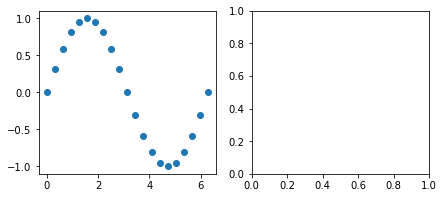

In [7]:
#create a scatter plot for y
ax[0].scatter(x, y)
fig

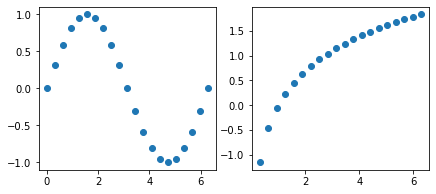

In [8]:
#plot z on secondary axis
ax[1].scatter(x, z)
fig

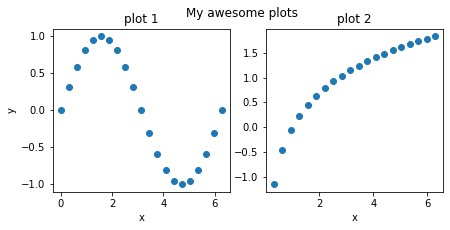

In [9]:
#setting labels for the plots

ax[0].set(xlabel = "x",
          ylabel = "y",
          title = "plot 1")
ax[1].set(xlabel = "x",
          title = "plot 2")
fig.suptitle("My awesome plots")
fig

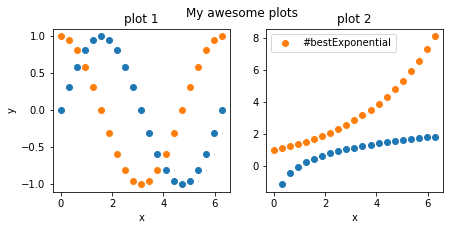

In [10]:
#setting a legend and printing it 

ax[0].scatter(x, np.cos(x))
ax[1].scatter(x, np.exp(x/3), label = "#bestExponential")
ax[1].legend()
fig

## §1. Load the Data

Run the code block below to load the data. 

- The function `pd.read_csv()` is used to read CSV files into a Python data structure called a *data frame*. We'll make good friends with data frames very, very soon. We won't be working with data frames directly -- instead, in the final three lines, we create three `numpy` arrays which will be our primary focus. 
- The function `pd.to_datetime()` is a utility to ensure that Python will interpret dates as objects with meaningful order, rather than strings. 

If the code below doesn't work for you, then you can instead directly download the file containing the data from CCLE (on the activity corresponding to this assignment) and save it in the same directory as this notebook. You would then substitute the `url` variable below with the path to the file. 


In [ ]:
# run this code block
import numpy as np
import pandas as pd # you'll learn much more about this line soon

url = "https://raw.githubusercontent.com/PhilChodrow/PIC16A/master/discussion/timeseries-sample-data.csv"
df = pd.read_csv(url)

dates = np.array(pd.to_datetime(df["dates"]))
symbols = np.array(df["symbols"])
prices = np.array(df["prices"])

## §2. Explore the Data

Each of these three arrays have the same shape, as you can check. The element `prices[i]` gives the closing price of the stock with symbol `symbols[i]` on day `dates[i]`. There are three stock symbols, represented by integers `0,1,2`. These symbols were chosen for no particular reason: 

```python
symbol_dict = {
    0 :  "Gamestop", # a brick-and-mortar video game store. 
    1 :  "AMC",      # an American movie theater chain.
    2 :  "Exxon"     # a major oil company.
}
```

For example, if `symbols[i] == 0`, then the corresponding entry `prices[i]` is the closing price of shares of Gamestop on day `dates[i]`. 

### What you should do

Write a short function that uses `numpy` tools (no `for`-loops!) to print a message like the following: 

```python
describe(0, dates, symbols, prices)
```

The `0` in the first argument corresponds to the Gamestop array. 

```
There are 252 entries for symbol 0.
The average value was 13.182539682539682.
The max value was 347.0.
The time period ran from 2020-02-03T00:00:00.000000000 to 2021-02-01T00:00:00.000000000.
```

Use your function to describe each of the three stock symbols. Note that you can use `np.min()` to extract the earliest date from `dates`.  Feel free to round relevant values if you'd like. Optionally, you can also make it so that your function prints the name of the symbol (like `"Gamestop"`) rather than the number `0`. 

***Hint***: Define a single Boolean array called `ix` which is `true` where the `symbols` array matches the input symbol (such as `0` for Gamestop). You can then use this Boolean array to easily obtain data subsets required to compute the other statistics.  

In [ ]:
# solution


## §3. Create a Figure

Using `matplotlib`, create a figure with three axes stacked on top of each other, one for each stock symbol. Your figure will look best if it's roughly square. For this part, it's not necessary to place anything on the figure. 

Recall that the relevant syntax is 

```python
fig, axarr = plt.subplots(num_plots, figsize)
```

Don't forget to import the `pyplot` module from `matplotlib`. 

At this stage, your output should look something like this: 

<figure class="image" style="width:50%">
  <img src="https://raw.githubusercontent.com/PhilChodrow/PIC16A/master/discussion/timeseries-example-blank.png" alt="">
  <figcaption><i></i></figcaption>
</figure>

In [ ]:
# your code here


## §4. Plot Data

Write a function called `plot_symbol(s, dates, symbols, prices, ax)`. This function, when called, should plot (i.e. `plt.plot()`) the price vs. date for the symbol `s` on the `ax` specified. Use your function to plot one of the three symbols on each of the three axes of your figure. If you're having trouble getting the figure to display, try copying the code from §3 into the same code block in which you call `plot_symbol`. 

You should see data plotted on each of the three axes. If it looks weird and very "zig-zaggy," that's expected -- you'll fix it in the next part. 

At this stage, your output should look something like this: 

<figure class="image" style="width:50%">
  <img src="https://raw.githubusercontent.com/PhilChodrow/PIC16A/master/discussion/timeseries-example-jumbled.png" alt="">
  <figcaption><i></i></figcaption>
</figure>

In [ ]:
# your code here


## §5. Sort and Plot

The `plt.plot()` function is confused because the data is not sorted by date. Copy and paste your code from §4 into the block below. Then, modify the `plot_symbol()` function so that it sorts both date and the price data before plotting. 

A good way to do this is with `np.argsort`. The result of `np.argsort(a)` is an array `ix` such that `a[ix]` is sorted. You can then use, say, `b[ix]` to sort `b` in exactly the same order as you sorted `a`. 

Remember, you need to sort **by date**, not by stock value. 

At this stage, your output should look something like this: 

<figure class="image" style="width:50%">
  <img src="https://raw.githubusercontent.com/PhilChodrow/PIC16A/master/discussion/timeseries-example-unlabeled.png" alt="">
  <figcaption><i></i></figcaption>
</figure>

In [ ]:
# your code here


## §6. Label and Annotate

Label your plots. This includes:

- Labels to the horizontal and vertical axes.
- Informative axis titles indicating which plot corresponds to which stock symbol. Feel free to use the dictionary from the description of §2 to create the titles. 

Additionally, feel free to make any other modifications you would like to the plot. You can change the color of the trendlines, for example. Another common modification is to remove the top and right axis borders, which can be done for a single axis `ax` via the code: 

```
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
```

If your figure looks "squished," calling `plt.tight_layout()` after your other plotting code can often help. 

Your output should look something like this: 

<figure class="image" style="width:50%">
  <img src="https://raw.githubusercontent.com/PhilChodrow/PIC16A/master/discussion/timeseries-example-labeled.png" alt="">
  <figcaption><i></i></figcaption>
</figure>

In [ ]:
# your code here
